Resolución Guía Prof. Carlos Dibárbora. (Teoría en el Campus).<br>
2024.

## 1. Cotas de errores
Una masa “puntual” se desplaza con una velocidad inicial desconocida durante un cierto tiempo hasta que se detiene. Suponiendo que se pueden medir la distancia recorrida Δx, el coeficiente de rozamiento μ, y la masa m del objeto, todos con sus incertezas asociadas, determinar mediante montecarlo las cotas máximas y mínimas de incerteza y la velocidad inicial a la que se dirigía el móvil y el tiempo que tardó en detenerse.<br>
Considere $ v^2 - v_{0}^2 = 2 a \Delta x$, $ N = P $, $P = m g$ y $F_r = \mu N$, de forma que reemplazando todo, la expresión de la velocidad inicial sea $ v_0 = \sqrt{2 \Delta x \mu g }$<br>
Mediante estas expresiones, se puede determinar el tiempo de desplazamiento como $t = \frac{\sqrt{(2 \Delta x \mu g)}}{\mu g} = \sqrt{\frac{2 \Delta x}{\mu g}}$<br>
Utilizar $\Delta x = 10 \pm 1 m $ y $\mu = 0.5 \pm 0.1$<br>
Con estas expresiones, propagar incertezas y comprobar validez por MonteCarlo

In [22]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000 #iteraciones
g = 9.8

x_max = 11
x_min= 9
mu_max = 0.6
mu_min = 0.4

# muestreo
x = np.random.random(N) * (x_max - x_min) +  x_min
mu = np.random.random(N) * (mu_max - mu_min) + mu_min

# resultado
v0 = np.sqrt( 2 * x * mu * g)
t = np.sqrt( 2 * x / (mu * g))

v0_mean = np.mean(v0)
t_mean = np.mean(t)

v0_std = np.std(v0)
v0_std_2 = np.std(v0)*2
t_std = np.std(t)
t_std_2 = np.std(t)*2


In [23]:
print('media velocidad: ', round(v0_mean,2),'m/s, sigma:' , round(v0_std,2),', 2 sigma:', round(v0_std_2,2) )
print('media tiempo: ', round(t_mean,2),'s, sigma:' , round(t_std,2),', 2 sigma:', round(t_std_2,2) )


media velocidad:  9.89 m/s, sigma: 0.64 , 2 sigma: 1.28
media tiempo:  2.03 s, sigma: 0.13 , 2 sigma: 0.27


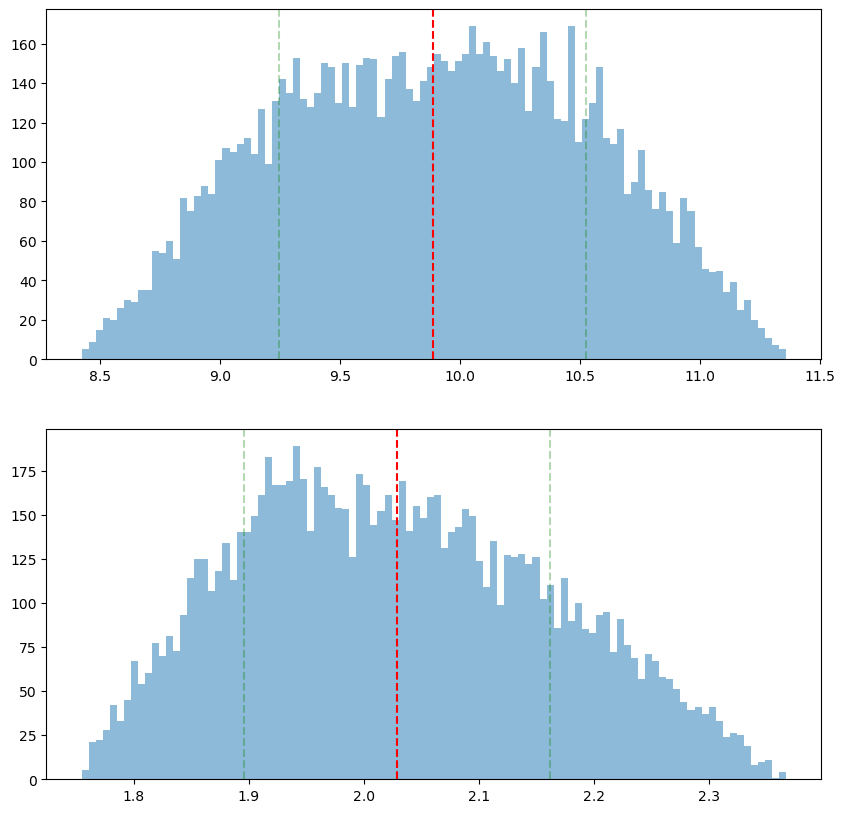

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].hist(v0,100, alpha = 0.5)
ax[0].axvline(v0_mean, color = 'red', linestyle = '--', label = 'media')
ax[0].axvline(v0_mean + (v0_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')
ax[0].axvline(v0_mean - (v0_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')

ax[1].hist(t,100, alpha = 0.5)
ax[1].axvline(t_mean, color = 'red', linestyle = '--', label = 'media')
ax[1].axvline(t_mean + (t_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')
ax[1].axvline(t_mean - (t_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')
plt.show()

In [25]:
### Errores: analiticamente, como para contrastar

v0_analitica = np.sqrt( 2 * 10 * 0.5 * g)
t_analitica = np.sqrt( 2 * 10 / (0.5 * g))

err_x = 1 / 10 
err_mu = 0.1 / 0.5

err_abs = (err_x + err_mu) * 0.5

print(v0_analitica, err_abs)
print(t_analitica, err_abs)

9.899494936611665 0.15000000000000002
2.0203050891044216 0.15000000000000002
